In [4]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dat=np.load('/home/maria/LuckyMouse2/neuron_property_decoding/data/neuron_embeddings.npy')

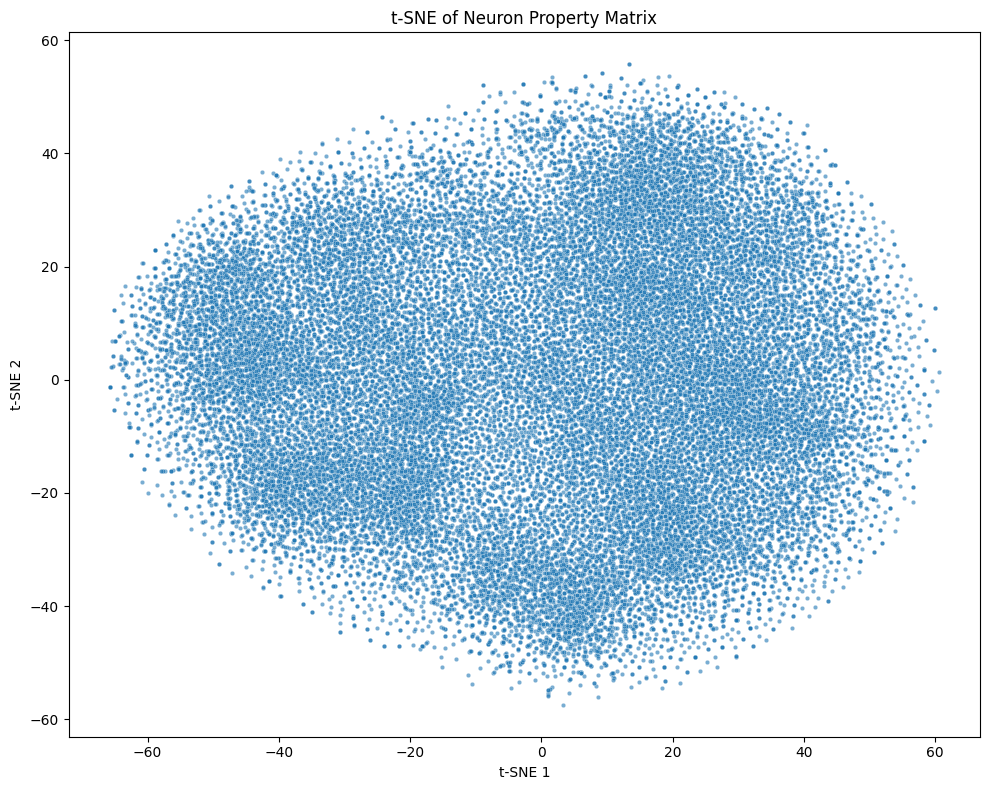

In [5]:
from sklearn.preprocessing import StandardScaler
Y_std = StandardScaler().fit_transform(dat)

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
Y_tsne = tsne.fit_transform(Y_std)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_tsne[:, 0], y=Y_tsne[:, 1], s=10, alpha=0.6)
plt.title("t-SNE of Neuron Property Matrix")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()



/home/maria/global_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/maria/global_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


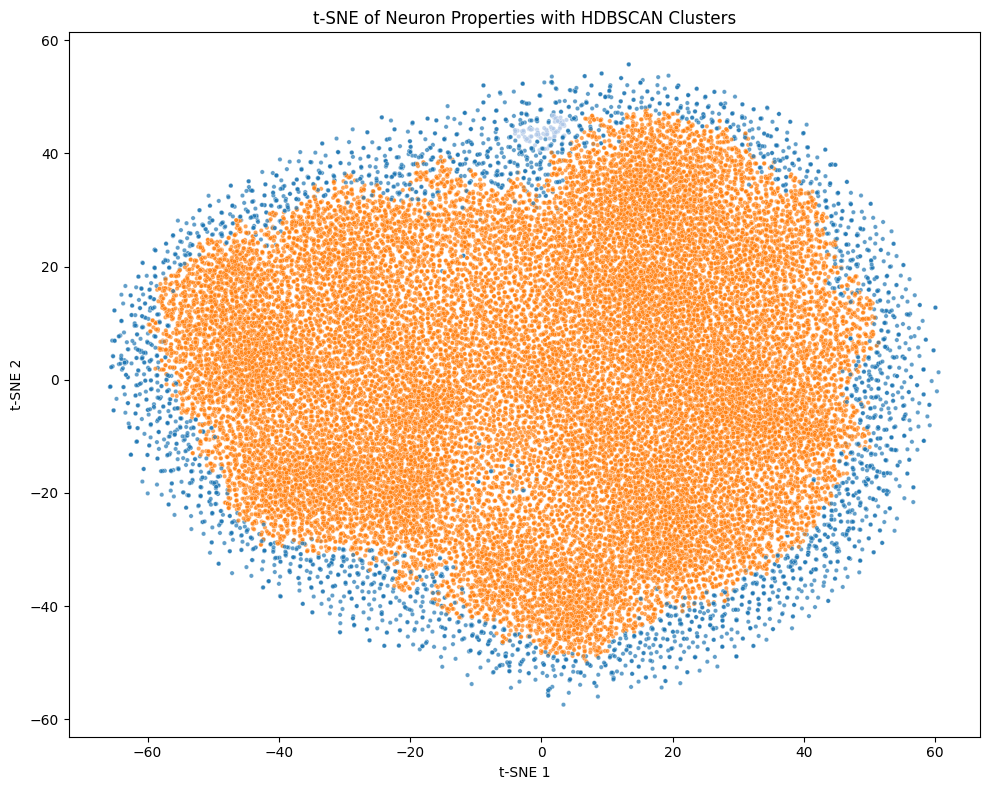

In [7]:
import hdbscan

# Fit HDBSCAN on the 2D t-SNE space
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=10)
cluster_labels = clusterer.fit_predict(Y_tsne)


# Visualize
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_tsne[:, 0], y=Y_tsne[:, 1], hue=cluster_labels,
                palette='tab20', s=10, alpha=0.7, legend=None)
plt.title("t-SNE of Neuron Properties with HDBSCAN Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()